In [165]:
from tkinter import *
import matplotlib.pyplot as plt
import numpy as np
import random
import serial
import time

In [735]:
dat = np.loadtxt("Matrix-Keyboard.txt", skiprows = 1)
# dat_im = dat[:, :2]
x = dat[:, 0]
y = dat[:, 17]
pulses = []
for col in range(1, 17):
    pulses.append(dat[:, col])

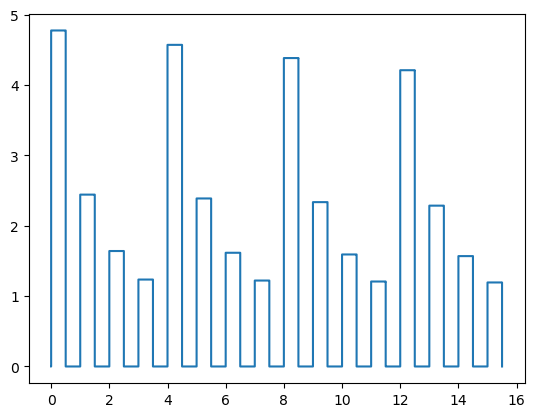

In [733]:
plt.plot(x, y)

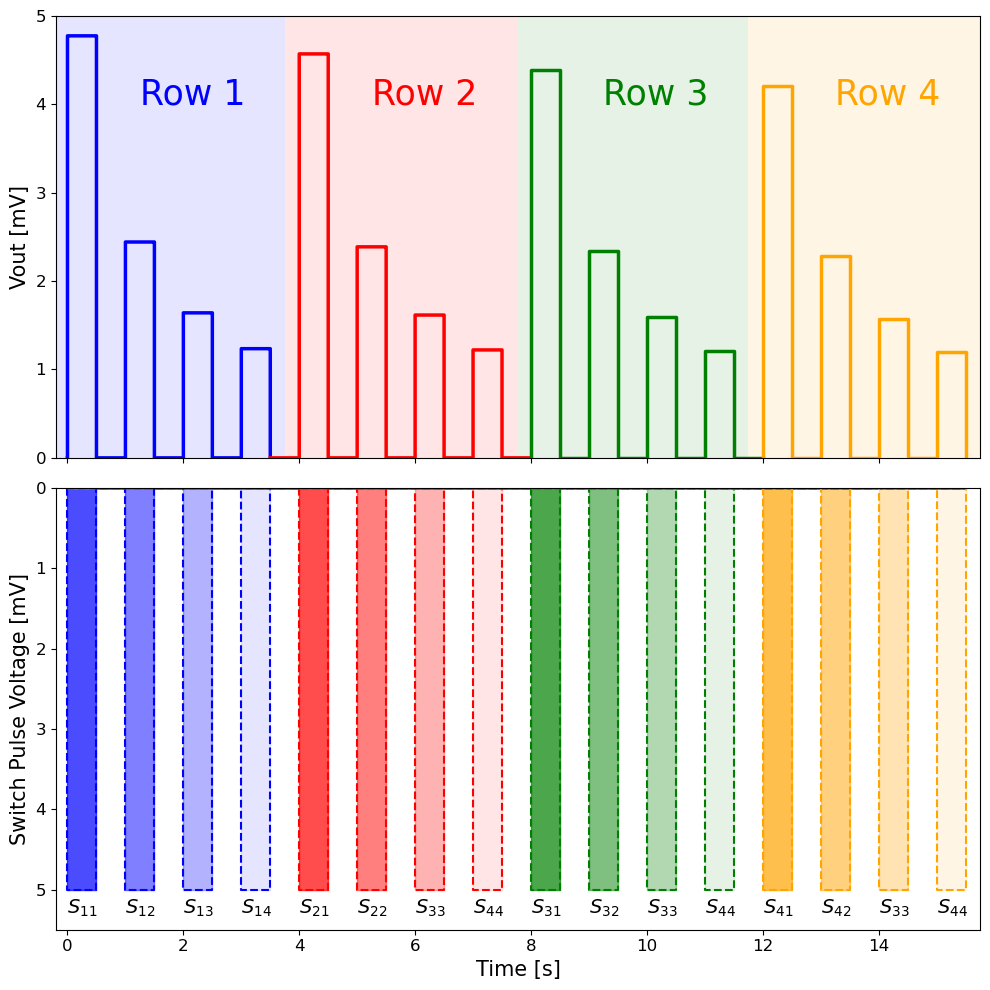

In [959]:
colors = ["blue", "blue", "blue", "blue",
         "red", "red", "red", "red",
         "green", "green", "green", "green",
         "orange", "orange", "orange", "orange"]

sws = ["11", "12", "13", "14",
      "21", "22", "33", "44",
      "31", "32", "33", "44",
      "41", "42", "33", "44",]

alphas = [0.7, 0.5, 0.3, 0.1,
          0.7, 0.5, 0.3, 0.1,
          0.7, 0.5, 0.3, 0.1,
          0.7, 0.5, 0.3, 0.1]

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharex = True)
plt.subplots_adjust(hspace = 0)
axs = axs.flatten()
ax1 = axs[0]
ax2 = axs[1]
for index, elem in enumerate(pulses):
    ax2.plot(x, elem, color = colors[index], linestyle = "--")
    ax2.fill_between(x, 0, elem, color = colors[index], alpha = alphas[index])
    ax2.text(index, 5.3, "$S_{{{}}}$".format(int(sws[index])), fontsize = 14)

alph = 0.1
w = 2.5

ax1.fill_betweenx(np.linspace(0, 5, 100), -1, 3.75, color = "blue", alpha = alph, ec = None)
ax1.text(1.25, 4, "Row 1", color = "blue", fontsize = 25)
ax1.fill_betweenx(np.linspace(0, 5, 100), 3.75, 7.75, color = "red", alpha = alph, ec = None)
ax1.text(5.25, 4, "Row 2", color = "red", fontsize = 25)
ax1.fill_betweenx(np.linspace(0, 5, 100), 7.75, 11.75, color = "green", alpha = alph, ec = None)
ax1.text(9.25, 4, "Row 3", color = "green", fontsize = 25)
ax1.fill_betweenx(np.linspace(0, 5, 100), 11.75, 15.75, color = "orange", alpha = alph, ec = None)
ax1.text(13.25, 4, "Row 4", color = "orange", fontsize = 25)

ax1.set_ylim(0, 5)
ax2.set_ylim(5.5, 0)
ax2.set_xlim(-0.2, 15.75)
ax1.plot(x[:21+1], y[:21+1], color = "blue", linewidth = w)
ax1.plot(x[21:21*2+1], y[21:21*2+1], color = "red", linewidth = w)
ax1.plot(x[21*2:21*3+1], y[21*2:21*3+1], color = "green", linewidth = w)
ax1.plot(x[21*3:21*4+1], y[21*3:21*4+1], color = "orange", linewidth = w)
ax1.tick_params(axis = "both", labelsize = 12)
ax2.tick_params(axis = "both", labelsize = 12)
ax1.set_ylabel("Vout [mV]", fontsize = 15)
ax2.set_ylabel("Switch Pulse Voltage [mV]", fontsize = 15)
ax2.set_xlabel("Time [s]", fontsize = 15)
plt.tight_layout()
plt.savefig("sim.svg")
plt.show()

In [919]:
x.shape

(84,)

In [781]:
int(x[1])

0

In [983]:
num_raw = y[y>0.5][1:]
start = 0
vals = []
for i in range(16):
    vals.append(num_raw[start])
    start += 3
vals1 = np.array(vals)
index = np.argsort(vals1)
# vals1.resize((4, 4))
# index.resize((4, 4))
# vals = np.sort(vals1) * 1000 # in mV
vals = vals1 * 1000 # in mV

# Arduino digitization
bits = 8
step = 5000 / (2**8 - 1) # in mV

# factors = vals / step

low_lim = np.int64(vals - step)
up_lim = np.int64(vals + step)

In [991]:
step

19.607843137254903

In [987]:
up_lim

array([4795, 2462, 1660, 1255, 4590, 2407, 1635, 1240, 4403, 2355, 1611,
       1227, 4230, 2305, 1588, 1213], dtype=int64)

In [989]:
sort_ = np.argsort(low_lim)
print(low_lim[sort_])
print(up_lim[sort_])

[1174 1187 1201 1215 1549 1572 1596 1621 2266 2316 2368 2422 4191 4363
 4551 4755]
[1213 1227 1240 1255 1588 1611 1635 1660 2305 2355 2407 2462 4230 4403
 4590 4795]


In [71]:
vals

array([1194.045, 1207.543, 1221.35 , 1235.477, 1568.654, 1592.033,
       1616.12 , 1640.947, 2285.77 , 2335.752, 2387.969, 2442.574,
       4210.715, 4383.511, 4571.095, 4775.452])

In [85]:
index

array([15, 11,  7,  3, 14, 10,  6,  2, 13,  9,  5,  1, 12,  8,  4,  0],
      dtype=int64)

In [91]:
vals1.resize((4, 4))

In [97]:
vals1

array([[4.775452, 2.442574, 1.640947, 1.235477],
       [4.571095, 2.387969, 1.61612 , 1.22135 ],
       [4.383511, 2.335752, 1.592033, 1.207543],
       [4.210715, 2.28577 , 1.568654, 1.194045]])

In [103]:
index

array([[15, 11,  7,  3],
       [14, 10,  6,  2],
       [13,  9,  5,  1],
       [12,  8,  4,  0]], dtype=int64)

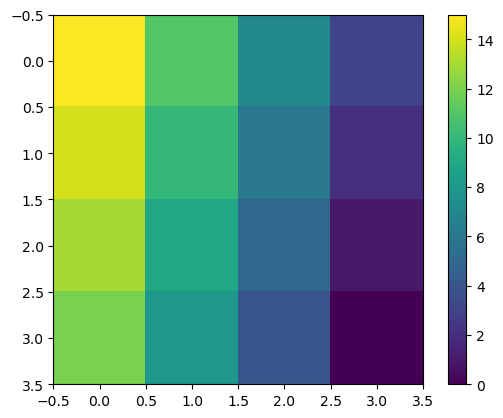

In [117]:
plt.imshow(index)
plt.colorbar()
plt.show()

In [113]:
vals1

array([[4.775452, 2.442574, 1.640947, 1.235477],
       [4.571095, 2.387969, 1.61612 , 1.22135 ],
       [4.383511, 2.335752, 1.592033, 1.207543],
       [4.210715, 2.28577 , 1.568654, 1.194045]])

In [125]:
power

array([-7.827070e-24, -7.827070e-24,  1.455632e-13,  1.455632e-13,
        1.455632e-13,  1.455632e-13, -7.827070e-24, -7.827070e-24,
        4.773948e-11,  4.773948e-11,  4.773948e-11, -7.827070e-24,
       -7.827070e-24, -4.669952e-12, -4.669952e-12, -4.669952e-12,
       -7.827070e-24, -7.827070e-24,  6.791534e-13,  6.791534e-13,
        6.791534e-13, -7.827070e-24, -7.827070e-24,  7.957849e-12,
        7.957849e-12,  7.957849e-12, -7.827070e-24, -7.827070e-24,
        4.616270e-11,  4.616270e-11,  4.616270e-11, -7.827070e-24,
       -7.827070e-24, -4.996825e-12, -4.996825e-12, -4.996825e-12,
       -7.827070e-24, -7.827070e-24,  3.969310e-13,  3.969310e-13,
        3.969310e-13, -7.827070e-24, -7.827070e-24,  2.170905e-11,
        2.170905e-11,  2.170905e-11, -7.827070e-24, -7.827070e-24,
        4.518743e-11,  4.518743e-11,  4.518743e-11, -7.827070e-24,
       -7.827070e-24, -5.065003e-12, -5.065003e-12, -5.065003e-12,
       -7.827070e-24, -7.827070e-24,  2.637316e-13,  2.637316e

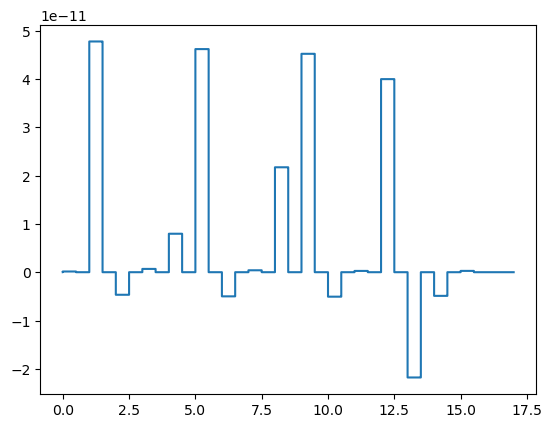

In [129]:
plt.plot(x, dat[:, 2])

In [133]:
from tkinter import *

In [357]:
# Initiate window
interface = Tk()
# Tkinter color chart: https://cs111.wellesley.edu/archive/cs111_fall14/public_html/labs/lab12/tkintercolor.html
interface.configure(background = "honeydew3")
interface.title("Keypad")
# Window size
interface.geometry('221x232')

int2 = Toplevel(interface)
int2.geometry('180x180')

# int3 = Toplevel(interface)
# int3.geometry('180x100')

serial_comm = serial.Serial("COM8", 57600, timeout = 1)
time.sleep(2)

xstart = 20
ystart = 20

def entval(val):
    # text_value = text.get()
    if val == 1:
        gen = random.randint(low_lim[0], up_lim[0])
        # return gen1
        # print(gen1)
    
    elif val == 2:
        gen = random.randint(low_lim[1], up_lim[1])
        # return gen1
        # print(gen1)

    elif val == 3:
        gen = random.randint(low_lim[2], up_lim[2])
        # return gen1
        # print(gen1)

    elif val == 4:
        gen = random.randint(low_lim[3], up_lim[3])
        # return gen1
        # print(gen1)

    elif val == 5:
        gen = random.randint(low_lim[4], up_lim[4])
        # return gen1
        # print(gen1)

    elif val == 6:
        gen = random.randint(low_lim[5], up_lim[5])
        # return gen1
        # print(gen1)

    elif val == 7:
        gen = random.randint(low_lim[6], up_lim[6])
        # return gen1
        # print(gen1)
    
    elif val == 8:
        gen = random.randint(low_lim[7], up_lim[7])
        # return gen1
        # print(gen1)

    elif val == 9:
        gen = random.randint(low_lim[8], up_lim[8])
        # return gen1
        # print(gen1)

    elif val == 10:
        gen = random.randint(low_lim[9], up_lim[9])
        # return gen1
        # print(gen1)

    elif val == 11:
        gen = random.randint(low_lim[10], up_lim[10])
        # return gen1
        # print(gen1)
    
    elif val == 12:
        gen = random.randint(low_lim[11], up_lim[11])
        # return gen1
        # print(gen1)

    elif val == 13:
        gen = random.randint(low_lim[12], up_lim[12])
        # return gen1
        # print(gen1)

    elif val == 14:
        gen = random.randint(low_lim[13], up_lim[13])
        # return gen1
        # print(gen1)

    elif val == 15:
        gen = random.randint(low_lim[14], up_lim[14])
        # return gen1
        # print(gen1)

    elif val == 16:
        gen = random.randint(low_lim[15], up_lim[15])
        # return gen1
        # print(gen1)

    label1.config(text = "{} mV".format(gen))
    label2.config(text = "SENT")
    int2.after(2000, lambda : label2.config(text = ""))
    serial_comm.write(f'{gen}\n'.encode())

    info = ""
    while info == "":
        info = serial_comm.readline().decode().strip()
    print(int(info))

    # time.sleep(0.5)
    # while serial_comm.in_waiting > 0:
    #     info = serial_comm.readline().decode().strip()
    #     print(info)

# def
# # Text Entry
# text = Entry(interface)
# text.place(x = 20, y = 20, width = 181, height = 50)

# Text Entry
label1 = Label(int2, bg = "white", font = ("Helvetica", 25))
label1.place(x = 20, y = 20, width = 140, height = 60)

label2 = Label(int2, bg = "black", font = ("Helvetica", 25, "bold"), fg = "green")
label2.place(x = 20, y = 100, width = 140, height = 60)

# Buttons
# Button dimensions
bx, by = 40, 40

# Row 1
def entval1():
    return entval(1)
button11 = Button(interface,
                  text = "1",
                  font = ("Helvetica", 15),
                  command = entval1
                 )
button11.place(x = xstart, y = ystart, width = bx, height = by)

def entval2():
    return entval(2)
button12 = Button(interface,
                  text = "2",
                  font = ("Helvetica", 15),
                  command = entval2
                 )
button12.place(x = xstart + 7 + bx, y = ystart, width = bx, height = by)

def entval3():
    return entval(3)
button13 = Button(interface,
                  text = "3",
                  font = ("Helvetica", 15),
                  command = entval3
                 )
button13.place(x = xstart + 2 * 7 + 2 * bx, y = ystart, width = bx, height = by)

def entval4():
    return entval(4)
button14 = Button(interface,
                  text = "AC",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "red",
                  command = entval4
                 )
button14.place(x = xstart + 3 * 7 + 3 * bx, y = ystart, width = bx, height = by)

# Row 2
def entval5():
    return entval(5)
button21 = Button(interface,
                  text = "4",
                  font = ("Helvetica", 15),
                  command = entval5
                 )
button21.place(x = xstart, y = ystart + 7 + by, width = bx, height = by)

def entval6():
    return entval(6)
button22 = Button(interface,
                  text = "5",
                  font = ("Helvetica", 15),
                  command = entval6
                 )
button22.place(x = xstart + 7 + bx, y = ystart + 7 + by, width = bx, height = by)

def entval7():
    return entval(7)
button23 = Button(interface,
                  text = "6",
                  font = ("Helvetica", 15),
                  command = entval7
                 )
button23.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 7 + by, width = bx, height = by)

def entval8():
    return entval(8)
button24 = Button(interface,
                  text = "+",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval8
                 )
button24.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 7 + by, width = bx, height = by)

# Row 3
def entval9():
    return entval(9)
button31 = Button(interface,
                  text = "7",
                  font = ("Helvetica", 15),
                  command = entval9
                 )
button31.place(x = xstart, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval10():
    return entval(10)
button32 = Button(interface,
                  text = "8",
                  font = ("Helvetica", 15),
                  command = entval10
                 )
button32.place(x = xstart + 7 + bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval11():
    return entval(11)
button33 = Button(interface,
                  text = "9",
                  font = ("Helvetica", 15),
                  command = entval11
                 )
button33.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval12():
    return entval(12)
button34 = Button(interface,
                  text = "–",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval12
                 )
button34.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

# Row 4
def entval13():
    return entval(13)
button41 = Button(interface,
                  text = "×",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "ivory4",
                  command = entval13
                 )
button41.place(x = xstart, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval14():
    return entval(14)
button42 = Button(interface,
                  text = "0",
                  font = ("Helvetica", 15),
                  command = entval14
                 )
button42.place(x = xstart + 7 + bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval15():
    return entval(15)
button43 = Button(interface,
                  text = "/",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "ivory4",
                  command = entval15
                 )
button43.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval16():
    return entval(16)
button44 = Button(interface,
                  text = "=",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval16
                 )
button44.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)


interface.mainloop()

# while True:
#     if serial_comm.in_waiting > 0:
#         line = serial_comm.readline().decode().strip()
#         print(line)
#         break  # Stop after reading one response

# while serial_comm.in_waiting > 0:
#     info = serial_comm.readline().decode().strip()
#     print(info)

serial_comm.close()

2


In [353]:
info

NameError: name 'info' is not defined

In [355]:
gen

NameError: name 'gen' is not defined

In [271]:
random.randint(low_lim.ravel()[1], up_lim.ravel()[1])

1642

In [269]:
low_lim

array([[1230, 1636, 2437, 4770],
       [1216, 1611, 2383, 4566],
       [1202, 1587, 2330, 4378],
       [1189, 1563, 2280, 4205]], dtype=int64)

In [273]:
low_lim

array([[1230, 1636, 2437, 4770],
       [1216, 1611, 2383, 4566],
       [1202, 1587, 2330, 4378],
       [1189, 1563, 2280, 4205]], dtype=int64)

In [275]:
up_lim

array([[1240, 1645, 2447, 4780],
       [1226, 1621, 2392, 4575],
       [1212, 1596, 2340, 4388],
       [1198, 1573, 2290, 4215]], dtype=int64)

In [279]:
vals1

array([4.775452, 2.442574, 1.640947, 1.235477, 4.571095, 2.387969,
       1.61612 , 1.22135 , 4.383511, 2.335752, 1.592033, 1.207543,
       4.210715, 2.28577 , 1.568654, 1.194045])

In [281]:
low_lim

array([4770, 2437, 1636, 1230, 4566, 2383, 1611, 1216, 4378, 2330, 1587,
       1202, 4205, 2280, 1563, 1189], dtype=int64)

In [343]:
def entval1():
    return entval(2)

In [345]:
entval1()

2443


In [476]:

def entval(val):
    # text_value = text.get()
    if val == 1:
        gen1 = random.randint(low_lim[0], up_lim[0])
        # return gen1
        print(gen1)
    
    elif val == 2:
        gen1 = random.randint(low_lim[1], up_lim[1])
        # return gen1
        print(gen1)

    elif val == 3:
        gen1 = random.randint(low_lim[2], up_lim[2])
        # return gen1
        print(gen1)

    elif val == 4:
        gen1 = random.randint(low_lim[3], up_lim[3])
        # return gen1
        print(gen1)

    elif val == 5:
        gen1 = random.randint(low_lim[4], up_lim[4])
        # return gen1
        print(gen1)

    elif val == 6:
        gen1 = random.randint(low_lim[5], up_lim[5])
        # return gen1
        print(gen1)

    elif val == 7:
        gen1 = random.randint(low_lim[6], up_lim[6])
        # return gen1
        print(gen1)
    
    elif val == 8:
        gen1 = random.randint(low_lim[7], up_lim[7])
        # return gen1
        print(gen1)

    elif val == 9:
        gen1 = random.randint(low_lim[8], up_lim[8])
        # return gen1
        print(gen1)

    elif val == 10:
        gen1 = random.randint(low_lim[9], up_lim[9])
        # return gen1
        print(gen1)

    elif val == 11:
        gen1 = random.randint(low_lim[10], up_lim[10])
        # return gen1
        print(gen1)
    
    elif val == 12:
        gen1 = random.randint(low_lim[11], up_lim[11])
        # return gen1
        print(gen1)

    elif val == 13:
        gen1 = random.randint(low_lim[12], up_lim[12])
        # return gen1
        print(gen1)

    elif val == 14:
        gen1 = random.randint(low_lim[13], up_lim[13])
        # return gen1
        print(gen1)

    elif val == 15:
        gen1 = random.randint(low_lim[14], up_lim[14])
        # return gen1
        print(gen1)

    elif val == 16:
        gen1 = random.randint(low_lim[15], up_lim[15])
        # return gen1
        print(gen1)

In [512]:
u = "7+2-8"

In [255]:
len(u)

7

In [414]:
# Initiate window
interface = Tk()
# Tkinter color chart: https://cs111.wellesley.edu/archive/cs111_fall14/public_html/labs/lab12/tkintercolor.html
interface.configure(background = "honeydew3")
interface.title("Keypad")
# Window size
interface.geometry('221x232')

int2 = Toplevel(interface)
int2.geometry('280x180')

# int3 = Toplevel(interface)
# int3.geometry('180x100')

# serial_comm = serial.Serial("COM8", 57600, timeout = 1)
# time.sleep(2)

xstart = 20
ystart = 20

def entval(val):
    # text_value = text.get()
    if val == 1:
        gen = "1"
        # return gen1
        # print(gen1)
    
    elif val == 2:
        gen = "2"
        # return gen1
        # print(gen1)

    elif val == 3:
        gen = "3"
        # return gen1
        # print(gen1)

    elif val == 4:
        gen = "C"
        # return gen1
        # print(gen1)

    elif val == 5:
        gen = "4"
        # return gen1
        # print(gen1)

    elif val == 6:
        gen = "5"
        # return gen1
        # print(gen1)

    elif val == 7:
        gen = "6"
        # return gen1
        # print(gen1)
    
    elif val == 8:
        gen = "+"
        # return gen1
        # print(gen1)

    elif val == 9:
        gen ="7"
        # return gen1
        # print(gen1)

    elif val == 10:
        gen = "8"
        # return gen1
        # print(gen1)

    elif val == 11:
        gen = "9"
        # return gen1
        # print(gen1)
    
    elif val == 12:
        gen = "-"
        # return gen1
        # print(gen1)

    elif val == 13:
        gen = "*"
        # return gen1
        # print(gen1)

    elif val == 14:
        gen = "0"
        # return gen1
        # print(gen1)

    elif val == 15:
        gen = "/"
        # return gen1
        # print(gen1)

    elif val == 16:
        gen = "="
        # return gen1
        # print(gen1)

    # now = label1.cget("text")
    # label1.config(text = now + gen)
    # label1.config(text = "{} mV".format(gen))
    # label2.config(text = "SENT")
    if gen == "=":
        u = label1.cget("text")
        # if "++"
        
        ans = opr(u)
        if ans == "Syntax ERROR":
            label2.config(text = ans, font = ("Helvetica", 20, "bold"))
        else:
            ans_ = str(ans)
            if len(ans_) > 11:
                ans_ = ans_[:11]
            label2.config(text = ans_, font = ("Helvetica", 25))

    elif gen == "C":
        label1.config(text = "")
        label2.config(text = "", font = ("Helvetica", 25))
    else:
        now = label1.cget("text")
        label1.config(text = now + gen)
    # int2.after(2000, lambda : label2.config(text = ""))
    # serial_comm.write(f'{gen}\n'.encode())

    # info = ""
    # while info == "":
    #     info = serial_comm.readline().decode().strip()
    # print(info)

    # time.sleep(0.5)
    # while serial_comm.in_waiting > 0:
    #     info = serial_comm.readline().decode().strip()
    #     print(info)

# def
# # Text Entry
# text = Entry(interface)
# text.place(x = 20, y = 20, width = 181, height = 50)

# Text Entry
label1 = Label(int2, bg = "white", font = ("Helvetica", 15), wraplength = 200, anchor = "e")
label1.place(x = 20, y = 20, width = 240, height = 60)

label2 = Label(int2, bg = "black", font = ("Helvetica", 25, "bold"), fg = "green")
label2.place(x = 20, y = 100, width = 240, height = 60)

# Buttons
# Button dimensions
bx, by = 40, 40

# Row 1
def entval1():
    return entval(1)
button11 = Button(interface,
                  text = "1",
                  font = ("Helvetica", 15),
                  command = entval1
                 )
button11.place(x = xstart, y = ystart, width = bx, height = by)

def entval2():
    return entval(2)
button12 = Button(interface,
                  text = "2",
                  font = ("Helvetica", 15),
                  command = entval2
                 )
button12.place(x = xstart + 7 + bx, y = ystart, width = bx, height = by)

def entval3():
    return entval(3)
button13 = Button(interface,
                  text = "3",
                  font = ("Helvetica", 15),
                  command = entval3
                 )
button13.place(x = xstart + 2 * 7 + 2 * bx, y = ystart, width = bx, height = by)

def entval4():
    return entval(4)
button14 = Button(interface,
                  text = "AC",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "red",
                  command = entval4
                 )
button14.place(x = xstart + 3 * 7 + 3 * bx, y = ystart, width = bx, height = by)

# Row 2
def entval5():
    return entval(5)
button21 = Button(interface,
                  text = "4",
                  font = ("Helvetica", 15),
                  command = entval5
                 )
button21.place(x = xstart, y = ystart + 7 + by, width = bx, height = by)

def entval6():
    return entval(6)
button22 = Button(interface,
                  text = "5",
                  font = ("Helvetica", 15),
                  command = entval6
                 )
button22.place(x = xstart + 7 + bx, y = ystart + 7 + by, width = bx, height = by)

def entval7():
    return entval(7)
button23 = Button(interface,
                  text = "6",
                  font = ("Helvetica", 15),
                  command = entval7
                 )
button23.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 7 + by, width = bx, height = by)

def entval8():
    return entval(8)
button24 = Button(interface,
                  text = "+",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval8
                 )
button24.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 7 + by, width = bx, height = by)

# Row 3
def entval9():
    return entval(9)
button31 = Button(interface,
                  text = "7",
                  font = ("Helvetica", 15),
                  command = entval9
                 )
button31.place(x = xstart, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval10():
    return entval(10)
button32 = Button(interface,
                  text = "8",
                  font = ("Helvetica", 15),
                  command = entval10
                 )
button32.place(x = xstart + 7 + bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval11():
    return entval(11)
button33 = Button(interface,
                  text = "9",
                  font = ("Helvetica", 15),
                  command = entval11
                 )
button33.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval12():
    return entval(12)
button34 = Button(interface,
                  text = "–",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval12
                 )
button34.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

# Row 4
def entval13():
    return entval(13)
button41 = Button(interface,
                  text = "×",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "ivory4",
                  command = entval13
                 )
button41.place(x = xstart, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval14():
    return entval(14)
button42 = Button(interface,
                  text = "0",
                  font = ("Helvetica", 15),
                  command = entval14
                 )
button42.place(x = xstart + 7 + bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval15():
    return entval(15)
button43 = Button(interface,
                  text = "/",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "ivory4",
                  command = entval15
                 )
button43.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval16():
    return entval(16)
button44 = Button(interface,
                  text = "=",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval16
                 )
button44.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)


interface.mainloop()

# while True:
#     if serial_comm.in_waiting > 0:
#         line = serial_comm.readline().decode().strip()
#         print(line)
#         break  # Stop after reading one response

# while serial_comm.in_waiting > 0:
#     info = serial_comm.readline().decode().strip()
#     print(info)

# serial_comm.close()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\utente\anaconda3\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\utente\AppData\Local\Temp\ipykernel_10236\1382906961.py", line 305, in entval16
    return entval(16)
           ^^^^^^^^^^
  File "C:\Users\utente\AppData\Local\Temp\ipykernel_10236\1382906961.py", line 111, in entval
    ans = opr(u)
          ^^^^^^
  File "C:\Users\utente\AppData\Local\Temp\ipykernel_10236\2647426107.py", line 109, in opr
    val = numbers1[n] / numbers1[n + 1]
          ~~~~~~~~~~~~^~~~~~~~~~~~~~~~~
ZeroDivisionError: division by zero
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\utente\anaconda3\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\utente\AppData\Local\Temp\ipykernel_10236\1382906961.py", line 305, in entval16
    return entval

In [528]:
stringval = "hello"

NameError: name 'find' is not defined

In [538]:
stringval.index("l")

2

In [540]:
[i for i, c in enumerate(stringval) if c == "l"]

[2, 3]

# Operation Debugging

In [675]:
u = "2*2/8*1/3*2*2" # 14 according to calculator here --> wrong

In [677]:
plus = "+"
minus = "-"
times = "*"
divide = "/"
operations = [plus, minus, times, divide]

indices = []
for index1, operation in enumerate(operations):
    for index2, element in enumerate(u):
        if operation == element:
            indices.append([index1, index2])
indices = np.array(indices)
# indices.sort

In [681]:
truthval = []
for i in indices[:, 1]:
    a1 = u[i-1]
    a2 = u[i+1]
    # print(a1, a2)
    if a1.isdigit() == True and a2.isdigit() == True:
        truthval.append(0)
    else:
        truthval.append(1)
# print(truthval)
truthval = np.array(truthval)
truthval = truthval.sum()
print(truthval)

0


In [450]:
if u[2].isdigit() == True and u[4].isdigit() == True:
    print(0)

0


In [452]:
print(indices, ord, ops)

[[0 1]
 [1 3]
 [2 5]
 [3 7]] [ 0  1  2  3  7 13  4 10  5 14  8 11  9  6 12 15] [0 0 0 0 1 3 0 2 0 3 1 2 1 0 2 3]


In [454]:
ord

array([ 0,  1,  2,  3,  7, 13,  4, 10,  5, 14,  8, 11,  9,  6, 12, 15],
      dtype=int64)

In [683]:
ord = np.argsort(indices[:, 1])
ops = indices[:, 0][ord]

ords = np.stack((ord, np.sort(indices[:, 1])), axis = 1)
numbers = []
for index, val in enumerate(ords[:, 1]):
    if val != 0:
        if index == len(ords[:, 1]) - 1:
            num = int(u[ords[:, 1][index - 1] + 1:val])
            numbers.append(num)
            
            num = int(u[val+1:])
            numbers.append(num)
        elif index == 0:
            num = int(u[:val])
            numbers.append(num)

            # num = int(u[val + 1: ords[:, 1][index + 1]])
            # numbers.append(num)
            
        else:
            num = int(u[ords[:, 1][index - 1] + 1:val])
            numbers.append(num)

In [685]:
numbers

[2, 2, 8, 1, 3, 2, 2]

In [671]:
ops

array([3, 2])

In [590]:
ops

array([2, 2, 3, 0, 1])

In [57]:
1234*543

670062

In [604]:
opsnew = ops
n
while 2 and 3 in opsnew:
    op = 0
    n = 0
    while op != 2:
        op = opsnew[n]
        n += 1

        val = numbers1[n - 1] * numbers1[n]

    opsnew.pop(n-1)
    numbers1.pop(n-1)
    numbers1.pop(n)
    numbers1.insert(n-1, val)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


KeyboardInterrupt: 

In [51]:
opsnew = list(ops)
op = 0
n = 0
while op != 2:
    op = opsnew[n]
    n += 1

    val = numbers1[n - 1] * numbers1[n]

opsnew.pop(n-1)
numbers1.pop(n-1)
numbers1.pop(n)
numbers1.insert(n-1, val)

In [105]:
ops

array([2, 2, 3, 0, 1])

In [659]:
u

'7+2-8'

In [697]:
opsnew = list(ops).copy()
numbers1 = numbers.copy()

print(opsnew,numbers1)#

print("Start Division")
while 3 in opsnew:
    op = 0
    n = 0
    while op != 3:
        op = opsnew[n]
        # print(op, numbers1[n], numbers1[n+1])

        if op == 3:
            if numbers1[n] != 0 and numbers1[n+1] == 0:
                val = "Division by zero!"
            elif numbers1[n] == 0 and numbers1[n+1] == 0:
                val = "Undefined"
            else:
                val = numbers1[n] / numbers1[n + 1]
        n += 1

    if val == "Division by zero!" or val == "Undefined":
        answer = val
        break
    else:
        opsnew.pop(n-1)
        del numbers1[n-1:n+1]
        # numbers1.pop(n-1)
        # numbers1.pop(n)
        numbers1.insert(n-1, val)

    print(opsnew, numbers1)
print("End Division")


print("Start Multiplication")

while 2 in opsnew:
    op = 0
    n = 0
    while op != 2:
        op = opsnew[n]

        val = numbers1[n] * numbers1[n + 1]
        n += 1

    opsnew.pop(n-1)
    del numbers1[n-1:n+1]
    # numbers1.pop(n-1)
    # numbers1.pop(n)
    numbers1.insert(n-1, val)


    print(opsnew, numbers1, n)
print("End multiplication")

for index, i in enumerate(opsnew):
    if i == 1:
        numbers1[index + 1] = -1 * numbers1[index + 1]
    print(opsnew, numbers1)

numbers1 = np.array(numbers1)
answer = numbers1.sum()
print(answer)

[2, 3, 2, 3, 2, 2] [2, 2, 8, 1, 3, 2, 2]
Start Division
[2, 2, 3, 2, 2] [2, 0.25, 1, 3, 2, 2]
[2, 2, 2, 2] [2, 0.25, 0.3333333333333333, 2, 2]
End Division
Start Multiplication
[2, 2, 2] [0.5, 0.3333333333333333, 2, 2] 1
[2, 2] [0.16666666666666666, 2, 2] 1
[2] [0.3333333333333333, 2] 1
[] [0.6666666666666666] 1
End multiplication
0.6666666666666666


In [157]:
24192/8

3024.0

In [73]:
numbers1

[363843666, 543, 14, 18]

In [103]:
1234*543

670062

In [115]:
ll = [1, 2, 3, 4]

In [117]:
del ll[0:1+1]

In [177]:
u = "125*48/6+320-45*3"

In [179]:
plus = "+"
minus = "-"
times = "*"
divide = "/"
operations = [plus, minus, times, divide]

indices = []
for index1, operation in enumerate(operations):
    for index2, element in enumerate(u):
        if operation == element:
            indices.append([index1, index2])
indices = np.array(indices)
# indices.sort

ord = np.argsort(indices[:, 1])
ops = indices[:, 0][ord]

ords = np.stack((ord, np.sort(indices[:, 1])), axis = 1)
numbers = []
for index, val in enumerate(ords[:, 1]):
    if val != 0:
        if index == len(ords[:, 1]) - 1:
            num = int(u[ords[:, 1][index - 1] + 1:val])
            numbers.append(num)
            
            num = int(u[val+1:])
            numbers.append(num)
        elif index == 0:
            num = int(u[:val])
            numbers.append(num)

            # num = int(u[val + 1: ords[:, 1][index + 1]])
            # numbers.append(num)
            
        else:
            num = int(u[ords[:, 1][index - 1] + 1:val])
            numbers.append(num)

opsnew = list(ops).copy()
numbers1 = numbers.copy()

# print(opsnew,numbers1)
# print("Start")

while 2 in opsnew:
    op = 0
    n = 0
    while op != 2:
        op = opsnew[n]

        val = numbers1[n] * numbers1[n + 1]
        n += 1

    opsnew.pop(n-1)
    del numbers1[n-1:n+1]
    # numbers1.pop(n-1)
    # numbers1.pop(n)
    numbers1.insert(n-1, val)


    # print(opsnew, numbers1, n)

while 3 in opsnew:
    op = 0
    n = 0
    while op != 3:
        op = opsnew[n]

        val = numbers1[n] / numbers1[n + 1]
        n += 1
    
    opsnew.pop(n-1)
    del numbers1[n-1:n+1]
    # numbers1.pop(n-1)
    # numbers1.pop(n)
    numbers1.insert(n-1, val)

    # print(opsnew, numbers1)

for i in opsnew:
    if i == 1:
        numbers1[i + 1] = -1 * numbers1[i + 1]
    # print(opsnew, numbers1)

numbers1 = np.array(numbers1)
answer = numbers1.sum()
print(answer)

1185.0


In [137]:
numbers

[1234, 543, 234, 12, 14, 18]

In [335]:
v = "3+"

In [337]:
v.isdigit()

False

# Working Project Start Below Here

In [339]:
def opr(u):
    plus = "+"
    minus = "-"
    times = "*"
    divide = "/"
    operations = [plus, minus, times, divide]

    if u.isdigit() == True:
        answer = u
    
    else:
        if u[0].isdigit() == True and u[-1].isdigit() == True:
        # plus = "+"
        # minus = "-"
        # times = "*"
        # divide = "/"
        # operations = [plus, minus, times, divide]
            
            indices = []
            for index1, operation in enumerate(operations):
                for index2, element in enumerate(u):
                    if operation == element:
                        indices.append([index1, index2])
            indices = np.array(indices)
            # indices.sort
        
            truthval = []
            for i in indices[:, 1]:
                a1 = u[i-1]
                a2 = u[i+1]
                # print(a1, a2)
                if a1.isdigit() == True and a2.isdigit() == True:
                    truthval.append(0)
                else:
                    truthval.append(1)
            # print(truthval)
            truthval = np.array(truthval)
            truthval = truthval.sum()
        
            if truthval > 0:
                answer = "Syntax ERROR"
        
            else:
                if indices.shape[0] == 1:
                    num1, num2 = int(u[:indices[0][1]]), int(u[indices[0][1] + 1:])
                    if indices[0][0] == 0:
                        answer = num1 + num2
                    elif indices[0][0] == 1:
                        answer = num1 - num2
                    elif indices[0][0] == 2:
                        answer = num1 * num2
                    elif indices[0][0] == 3:
                        answer = num1 / num2
                else:
                    ord = np.argsort(indices[:, 1])
                    ops = indices[:, 0][ord]
                    
                    ords = np.stack((ord, np.sort(indices[:, 1])), axis = 1)
                    numbers = []
                    for index, val in enumerate(ords[:, 1]):
                        if val != 0:
                            if index == len(ords[:, 1]) - 1:
                                num = int(u[ords[:, 1][index - 1] + 1:val])
                                numbers.append(num)
                                
                                num = int(u[val+1:])
                                numbers.append(num)
                            elif index == 0:
                                num = int(u[:val])
                                numbers.append(num)
                    
                                # num = int(u[val + 1: ords[:, 1][index + 1]])
                                # numbers.append(num)
                                
                            else:
                                num = int(u[ords[:, 1][index - 1] + 1:val])
                                numbers.append(num)
                    
                    opsnew = list(ops).copy()
                    numbers1 = numbers.copy()
                    
                    # print(opsnew,numbers1)
                    # print("Start")
                    
                    while 2 in opsnew:
                        op = 0
                        n = 0
                        while op != 2:
                            op = opsnew[n]
                    
                            val = numbers1[n] * numbers1[n + 1]
                            n += 1
                    
                        opsnew.pop(n-1)
                        del numbers1[n-1:n+1]
                        # numbers1.pop(n-1)
                        # numbers1.pop(n)
                        numbers1.insert(n-1, val)
                    
                    
                        # print(opsnew, numbers1, n)
                    
                    while 3 in opsnew:
                        op = 0
                        n = 0
                        while op != 3:
                            op = opsnew[n]
                    
                            val = numbers1[n] / numbers1[n + 1]
                            n += 1
                        
                        opsnew.pop(n-1)
                        del numbers1[n-1:n+1]
                        # numbers1.pop(n-1)
                        # numbers1.pop(n)
                        numbers1.insert(n-1, val)
                    
                        # print(opsnew, numbers1)
                    
                    for index, i in enumerate(opsnew):
                        if i == 1:
                            numbers1[index + 1] = -1 * numbers1[index + 1]
                        # print(opsnew, numbers1)
                        # print(opsnew, numbers1)
                    
                    numbers1 = np.array(numbers1)
                    answer = numbers1.sum()
                # print(answer)
        else:
            answer = "Syntax ERROR"
            
    return answer

In [645]:
# Initiate window
interface = Tk()
# Tkinter color chart: https://cs111.wellesley.edu/archive/cs111_fall14/public_html/labs/lab12/tkintercolor.html
interface.configure(background = "honeydew3")
interface.title("MDAS Calculator")
# Window size
interface.geometry('475x221')

# int2 = Toplevel(interface)
# int2.geometry('280x180')
# int2.title("Calculator Screen")

int3 = Toplevel(interface)
int3.geometry('250x221')
int3.title("Sending Info")
bgcolor = "slate gray"
int3.config(bg = bgcolor)

# int3 = Toplevel(interface)
# int3.geometry('180x100')

serial_comm = serial.Serial("COM8", 57600, timeout = 1)
time.sleep(2)


# int3 = Toplevel(interface)
# int3.geometry('180x100')

# serial_comm = serial.Serial("COM8", 57600, timeout = 1)
# time.sleep(2)

xstart = 274
ystart = 20

def entval(val):
    # text_value = text.get()
    if val == 1:
        gen = random.randint(low_lim[0], up_lim[0])
        # return gen1
        # print(gen1)
    
    elif val == 2:
        gen = random.randint(low_lim[1], up_lim[1])
        # return gen1
        # print(gen1)

    elif val == 3:
        gen = random.randint(low_lim[2], up_lim[2])
        # return gen1
        # print(gen1)

    elif val == 4:
        gen = random.randint(low_lim[3], up_lim[3])
        # return gen1
        # print(gen1)

    elif val == 5:
        gen = random.randint(low_lim[4], up_lim[4])
        # return gen1
        # print(gen1)

    elif val == 6:
        gen = random.randint(low_lim[5], up_lim[5])
        # return gen1
        # print(gen1)

    elif val == 7:
        gen = random.randint(low_lim[6], up_lim[6])
        # return gen1
        # print(gen1)
    
    elif val == 8:
        gen = random.randint(low_lim[7], up_lim[7])
        # return gen1
        # print(gen1)

    elif val == 9:
        gen = random.randint(low_lim[8], up_lim[8])
        # return gen1
        # print(gen1)

    elif val == 10:
        gen = random.randint(low_lim[9], up_lim[9])
        # return gen1
        # print(gen1)

    elif val == 11:
        gen = random.randint(low_lim[10], up_lim[10])
        # return gen1
        # print(gen1)
    
    elif val == 12:
        gen = random.randint(low_lim[11], up_lim[11])
        # return gen1
        # print(gen1)

    elif val == 13:
        gen = random.randint(low_lim[12], up_lim[12])
        # return gen1
        # print(gen1)

    elif val == 14:
        gen = random.randint(low_lim[13], up_lim[13])
        # return gen1
        # print(gen1)

    elif val == 15:
        gen = random.randint(low_lim[14], up_lim[14])
        # return gen1
        # print(gen1)

    elif val == 16:
        gen = random.randint(low_lim[15], up_lim[15])
        # return gen1
        # print(gen1)

    # now = label1.cget("text")
    # label1.config(text = now + gen)
    # label1.config(text = "{} mV".format(gen))
    # label2.config(text = "SENT")
    label3.config(text = "{} mV".format(gen))
    label4.config(text = "SENT")
    int3.after(2000, lambda : label4.config(text = ""))
    serial_comm.write(f'{gen}\n'.encode())

    info = ""
    while info == "":
        info = serial_comm.readline().decode().strip()
    gen_ = conv(int(info))
    # print(info)
    
    if gen_ == "=":
        u = label1.cget("text")
        # if "++"
        
        ans = opr(u)
        if ans == "Syntax ERROR":
            label2.config(text = ans, font = ("Helvetica", 20, "bold"))
        elif ans == "Division by zero!":
            label2.config(text = ans, font = ("Helvetica", 15, "bold"))
        elif ans == "Undefined":
            label2.config(text = ans, font = ("Helvetica", 20, "bold"))
        else:
            ans_ = str(ans)
            if len(ans_) > 11:
                ans_ = ans_[:11]
            label2.config(text = ans_, font = ("Helvetica", 25, "bold"))

    elif gen_ == "AC":
        label1.config(text = "")
        label2.config(text = "", font = ("Helvetica", 25, "bold"))
    else:
        now = label1.cget("text")
        label1.config(text = now + gen_)

    # int2.after(2000, lambda : label2.config(text = ""))
    # serial_comm.write(f'{gen}\n'.encode())

    # info = ""
    # while info == "":
    #     info = serial_comm.readline().decode().strip()
    # print(info)

    # time.sleep(0.5)
    # while serial_comm.in_waiting > 0:
    #     info = serial_comm.readline().decode().strip()
    #     print(info)

# def
# # Text Entry
# text = Entry(interface)
# text.place(x = 20, y = 20, width = 181, height = 50)

# Text Entry
label1 = Label(interface, bg = "white", font = ("Helvetica", 15), wraplength = 200, anchor = "e")
label1.place(x = 20, y = 20, width = 240, height = 101)

label2 = Label(interface, bg = "black", font = ("Helvetica", 25, "bold"), fg = "green")
label2.place(x = 20, y = 141, width = 240, height = 60)



label3 = Label(int3, bg = "white", font = ("Helvetica", 25))
label3.place(x = 20, y = 43, width = 210, height = 60)
label3_ = Label(int3, bg = bgcolor, font = ("Helvetica", 10, "bold"), fg = "white", anchor = "w")
label3_.place(x = 20, y = 15, width = 210, height = 20)
label3_.config(text = "Analog Voltage")
# text_3 = Text(int3, width = 210, height = 20)
# text_3.insert("1.0", "Analog Voltage")
# text_3.config(font = ("Helvetica", 20, "bold"), fg = "white")


label4 = Label(int3, bg = "black", font = ("Helvetica", 25, "bold"), fg = "green")
label4.place(x = 20, y = 138, width = 210, height = 60)
label4_ = Label(int3, bg = bgcolor, font = ("Helvetica", 10, "bold"), fg = "white", anchor = "w")
label4_.place(x = 20, y = 115, width = 210, height = 20)
label4_.config(text = "Status")
# text_4 = Text(int3, width = 210, height = 20)
# text_4.insert("1.0", "Status")
# text_4.config(font = ("Helvetica", 20, "bold"), fg = "white")

# Buttons
# Button dimensions
bx, by = 40, 40

# Row 1
def entval1():
    return entval(1)
button11 = Button(interface,
                  text = "1",
                  font = ("Helvetica", 15),
                  command = entval1
                 )
button11.place(x = xstart, y = ystart, width = bx, height = by)

def entval2():
    return entval(2)
button12 = Button(interface,
                  text = "2",
                  font = ("Helvetica", 15),
                  command = entval2
                 )
button12.place(x = xstart + 7 + bx, y = ystart, width = bx, height = by)

def entval3():
    return entval(3)
button13 = Button(interface,
                  text = "3",
                  font = ("Helvetica", 15),
                  command = entval3
                 )
button13.place(x = xstart + 2 * 7 + 2 * bx, y = ystart, width = bx, height = by)

def entval4():
    return entval(4)
button14 = Button(interface,
                  text = "AC",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "red",
                  command = entval4
                 )
button14.place(x = xstart + 3 * 7 + 3 * bx, y = ystart, width = bx, height = by)

# Row 2
def entval5():
    return entval(5)
button21 = Button(interface,
                  text = "4",
                  font = ("Helvetica", 15),
                  command = entval5
                 )
button21.place(x = xstart, y = ystart + 7 + by, width = bx, height = by)

def entval6():
    return entval(6)
button22 = Button(interface,
                  text = "5",
                  font = ("Helvetica", 15),
                  command = entval6
                 )
button22.place(x = xstart + 7 + bx, y = ystart + 7 + by, width = bx, height = by)

def entval7():
    return entval(7)
button23 = Button(interface,
                  text = "6",
                  font = ("Helvetica", 15),
                  command = entval7
                 )
button23.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 7 + by, width = bx, height = by)

def entval8():
    return entval(8)
button24 = Button(interface,
                  text = "+",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval8
                 )
button24.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 7 + by, width = bx, height = by)

# Row 3
def entval9():
    return entval(9)
button31 = Button(interface,
                  text = "7",
                  font = ("Helvetica", 15),
                  command = entval9
                 )
button31.place(x = xstart, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval10():
    return entval(10)
button32 = Button(interface,
                  text = "8",
                  font = ("Helvetica", 15),
                  command = entval10
                 )
button32.place(x = xstart + 7 + bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval11():
    return entval(11)
button33 = Button(interface,
                  text = "9",
                  font = ("Helvetica", 15),
                  command = entval11
                 )
button33.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

def entval12():
    return entval(12)
button34 = Button(interface,
                  text = "–",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval12
                 )
button34.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 2 * 7 + 2 * by, width = bx, height = by)

# Row 4
def entval13():
    return entval(13)
button41 = Button(interface,
                  text = "×",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "ivory4",
                  command = entval13
                 )
button41.place(x = xstart, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval14():
    return entval(14)
button42 = Button(interface,
                  text = "0",
                  font = ("Helvetica", 15),
                  command = entval14
                 )
button42.place(x = xstart + 7 + bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval15():
    return entval(15)
button43 = Button(interface,
                  text = "/",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "ivory4",
                  command = entval15
                 )
button43.place(x = xstart + 2 * 7 + 2 * bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)

def entval16():
    return entval(16)
button44 = Button(interface,
                  text = "=",
                  font = ("Helvetica", 15),
                  fg = "white",
                  bg = "snow4",
                  command = entval16
                 )
button44.place(x = xstart + 3 * 7 + 3 * bx, y = ystart + 3 * 7 + 3 * by, width = bx, height = by)


interface.mainloop()

# while True:
#     if serial_comm.in_waiting > 0:
#         line = serial_comm.readline().decode().strip()
#         print(line)
#         break  # Stop after reading one response

# while serial_comm.in_waiting > 0:
#     info = serial_comm.readline().decode().strip()
#     print(info)

serial_comm.close()

In [343]:
bvals = ["1", "2", "3", "AC", "4", "5", "6", "+", "7", "8", "9", "-", "*", "0", "/", "="]
def conv(val):
    return bvals[val - 1]

In [ ]:
    label1.config(text = "{} mV".format(gen))
    label2.config(text = "SENT")
    int2.after(2000, lambda : label2.config(text = ""))
    serial_comm.write(f'{gen}\n'.encode())

    info = ""
    while info == "":
        info = serial_comm.readline().decode().strip()
    print(info)

In [347]:
bvals[1]

'2'

In [410]:
from test_bench import low_lim, up_lim

In [412]:
low_lim

array([4770, 2437, 1636, 1230, 4566, 2383, 1611, 1216, 4378, 2330, 1587,
       1202, 4205, 2280, 1563, 1189], dtype=int64)

In [406]:
low_lim = 1

In [408]:
low_lim

1

In [559]:
import numpy as np

# This function is used for performing MDAS calculation from the given string
def opr(u):
    # Define the operations
    plus = "+"
    minus = "-"
    times = "*"
    divide = "/"
    operations = [plus, minus, times, divide]

    # Determine if the text is only digit. If yes then return the answer as is
    if u.isdigit() == True:
        answer = u

    # Else, perform the next steps
    else:
        # If it contains multiple operations within the string, check first 
        # if the first and last elements are not operations because each operation
        # require to have more than one operands.
        if u[0].isdigit() == True and u[-1].isdigit() == True:

            # Code for extracting the operations used in the string
            indices = []
            for index1, operation in enumerate(operations):
                for index2, element in enumerate(u):
                    # Scan each operation on the string
                    if operation == element:
                        # If found, record the operation and the location
                        indices.append([index1, index2])
            indices = np.array(indices)

            # This is to check that there are operands for each operation, or each
            # operand is not followed by another one
            truthval = []
            for i in indices[:, 1]:
                a1 = u[i-1]
                a2 = u[i+1]
                if a1.isdigit() == True and a2.isdigit() == True:
                    truthval.append(0)
                else:
                    truthval.append(1)
                    
            truthval = np.array(truthval)
            # Get the metric for determining if there is any repeated operation or
            # combination of operations next to each other
            truthval = truthval.sum()

            # Check. If yes, then return an error answer
            if truthval > 0:
                answer = "Syntax ERROR"

            # Otherwise, proceed with calculation.
            else:
                # Check if there is only one operation. Then perform it right away
                if indices.shape[0] == 1:
                    num1, num2 = int(u[:indices[0][1]]), int(u[indices[0][1] + 1:])
                    # Addition
                    if indices[0][0] == 0:
                        answer = num1 + num2
                    # Subtraction
                    elif indices[0][0] == 1:
                        answer = num1 - num2
                    # Multiplication
                    elif indices[0][0] == 2:
                        answer = num1 * num2
                    # Division
                    elif indices[0][0] == 3:
                        # Check if division by zero
                        if num1 != 0 and num2 == 0:
                            answer = "Division by zero!"
                        # Check if undefined
                        elif num1 == 0 and num2 == 0:
                            answer = "Undefined"
                        # Otherwise
                        else:
                            answer = num1 / num2

                # If more than one operation
                else:
                    # Since after scanning, the recorded position are not in order
                    # Arrange them in ascending order to extract the numbers in between
                    # the operations

                    # Get the correct arrangement of locations
                    ord = np.argsort(indices[:, 1])
                    # Reorganize the correct order of operations within the string
                    ops = indices[:, 0][ord]

                    ords = np.stack((ord, np.sort(indices[:, 1])), axis = 1)
                    # Holder for the numbers
                    numbers = []
                    for index, val in enumerate(ords[:, 1]):
                        # Just check if the first element is not an operation
                        if val != 0:
                            # For number extraction, get the number before the
                            # operation. For the last operation, get the one after
                            # it as well

                            # Last operation
                            if index == len(ords[:, 1]) - 1:
                                # Before the operation
                                num = int(u[ords[:, 1][index - 1] + 1:val])
                                numbers.append(num)

                                # After the operation
                                num = int(u[val+1:])
                                numbers.append(num)

                            # First operation, start with the start of the string
                            elif index == 0:
                                num = int(u[:val])
                                numbers.append(num)
                    
                            # Operations that are not the first and last
                            else:
                                num = int(u[ords[:, 1][index - 1] + 1:val])
                                numbers.append(num)

                    # Use lists to copy the files above
                    # These will be used to perform the operation step by step
                    opsnew = list(ops).copy()
                    numbers1 = numbers.copy()
                    
                    # Start first with multiplication which is referred as 2
                    # This is a loop which perform all the multiplications within
                    # the string

                    # This code stops when there are no more multiplication
                    while 2 in opsnew:
                        # Initialize the variables
                        op = 0
                        n = 0
                        # This one scans the operations from the operations sequence
                        # If it detects multiplication, it performs the operation
                        # below and re-update the index
                        # AFter the operation it stops this nested loop
                        while op != 2:
                            # Get the value of the next operation
                            op = opsnew[n]

                            # Apply multiplication
                            val = numbers1[n] * numbers1[n + 1]
                            n += 1

                        # Now, remove the multiplication operation recently performed
                        opsnew.pop(n-1)
                        # Delete the numbers involved in the previous operation
                        del numbers1[n-1:n+1]
                        # Then insert the new product
                        numbers1.insert(n-1, val)

                        # Although the multiplication stops, this is still within the
                        # another loop. This bigger loop checks again for 2 in the
                        # updated sequence of operations and performs the next set of
                        # multiplication.
                    
                    # The following loop is similar to above but for division instead
                    prompt = "Continue"
                    while 3 in opsnew:
                        op = 0
                        n = 0
                        while op != 3:
                            op = opsnew[n]

                            # Just do division when op == 3 to avoid division by zero and error
                            if op == 3:
                                # Check if division by zero
                                if numbers1[n] != 0 and numbers1[n+1] == 0:
                                    val = "Division by zero!"
                                # Check if both numerator and denominator are zero
                                elif numbers1[n] == 0 and numbers1[n+1] == 0:
                                    val = "Undefined"
                                # Otherwise
                                else:
                                    val = numbers1[n] / numbers1[n + 1]
                            n += 1
                        # Make the answer division by zero or undefined if detected
                        if val == "Division by zero!" or val == "Undefined":
                            answer = val
                            prompt = "Stop"
                            break
                        else:
                            opsnew.pop(n-1)
                            del numbers1[n-1:n+1]
                            numbers1.insert(n-1, val)
                            prompt = "Continue"
                    
                    # Do this only if answer is not division by zero or undefined
                    if prompt == "Continue":
                        # For subtraction, the process is to replace it with addition
                        # but make the number after subtraction operation negative
                        for index, i in enumerate(opsnew):
                            # Check if the operation is negative
                            if i == 1:
                                # If it is, change the corresonding number to negative
                                numbers1[index + 1] = -1 * numbers1[index + 1]
    
                        # All that is left is an list of numbers and the operation
                        # involved now is only addition. The list is converted to array
                        # then use the sum feature to get the answer
                        numbers1 = np.array(numbers1)
                        # Get the total sum after performing all the multiplication and
                        # division operations
                        answer = numbers1.sum()
            
            # return answer

        # For this one, show error answer if there are operations that are written
        # next to each other
        else:
            answer = "Syntax ERROR"
            # return answer

    # Return the answer
    return answer

# Conversion
# As Arduino sends information from 1-16, they are converted to equivalent symbols
# which the Tkinter interface interprets
bvals = ["1", "2", "3", "AC", "4", "5", "6", "+", "7", "8", "9", "-", "*", "0", "/", "="]
def conv(val):
    # Return the converted symbol
    return bvals[val - 1]

In [557]:
answer

1

In [657]:
ka = float(input())
ka_ = int(ka)
print(ka == ka_)

 7.00001


False


In [653]:
ka == ka_

False

In [709]:
u = "2*2/8*1/3*2*2" # 14 according to calculator here --> wrong
# Define the operations
plus = "+"
minus = "-"
times = "*"
divide = "/"
operations = [plus, minus, times, divide]

# Determine if the text is only digit. If yes then return the answer as is
if u.isdigit() == True:
    answer = u

# Else, perform the next steps
else:
    # If it contains multiple operations within the string, check first 
    # if the first and last elements are not operations because each operation
    # require to have more than one operands.
    if u[0].isdigit() == True and u[-1].isdigit() == True:

        # Code for extracting the operations used in the string
        indices = []
        for index1, operation in enumerate(operations):
            for index2, element in enumerate(u):
                # Scan each operation on the string
                if operation == element:
                    # If found, record the operation and the location
                    indices.append([index1, index2])
        indices = np.array(indices)

        # This is to check that there are operands for each operation, or each
        # operand is not followed by another one
        truthval = []
        for i in indices[:, 1]:
            a1 = u[i-1]
            a2 = u[i+1]
            if a1.isdigit() == True and a2.isdigit() == True:
                truthval.append(0)
            else:
                truthval.append(1)
                
        truthval = np.array(truthval)
        # Get the metric for determining if there is any repeated operation or
        # combination of operations next to each other
        truthval = truthval.sum()

        # Check. If yes, then return an error answer
        if truthval > 0:
            answer = "Syntax ERROR"

        # Otherwise, proceed with calculation.
        else:
            # Check if there is only one operation. Then perform it right away
            if indices.shape[0] == 1:
                num1, num2 = int(u[:indices[0][1]]), int(u[indices[0][1] + 1:])
                # Addition
                if indices[0][0] == 0:
                    answer = num1 + num2
                # Subtraction
                elif indices[0][0] == 1:
                    answer = num1 - num2
                # Multiplication
                elif indices[0][0] == 2:
                    answer = num1 * num2
                # Division
                elif indices[0][0] == 3:
                    # Check if division by zero
                    if num1 != 0 and num2 == 0:
                        answer = "Division by zero!"
                    # Check if undefined
                    elif num1 == 0 and num2 == 0:
                        answer = "Undefined"
                    # Otherwise
                    else:
                        answer = num1 / num2

                if answer == int(answer):
                    answer = int(answer)

            # If more than one operation
            else:
                # Since after scanning, the recorded position are not in order
                # Arrange them in ascending order to extract the numbers in between
                # the operations

                # Get the correct arrangement of locations
                ord = np.argsort(indices[:, 1])
                # Reorganize the correct order of operations within the string
                ops = indices[:, 0][ord]

                ords = np.stack((ord, np.sort(indices[:, 1])), axis = 1)
                # Holder for the numbers
                numbers = []
                for index, val in enumerate(ords[:, 1]):
                    # Just check if the first element is not an operation
                    if val != 0:
                        # For number extraction, get the number before the
                        # operation. For the last operation, get the one after
                        # it as well

                        # Last operation
                        if index == len(ords[:, 1]) - 1:
                            # Before the operation
                            num = int(u[ords[:, 1][index - 1] + 1:val])
                            numbers.append(num)

                            # After the operation
                            num = int(u[val+1:])
                            numbers.append(num)

                        # First operation, start with the start of the string
                        elif index == 0:
                            num = int(u[:val])
                            numbers.append(num)
                
                        # Operations that are not the first and last
                        else:
                            num = int(u[ords[:, 1][index - 1] + 1:val])
                            numbers.append(num)

                # Use lists to copy the files above
                # These will be used to perform the operation step by step
                opsnew = list(ops).copy()
                numbers1 = numbers.copy()
                
                # Start first with multiplication which is referred as 2
                # This is a loop which perform all the multiplications within
                # the string

                # The following loop is similar to multiplication below but 
                # for division instead
                prompt = "Continue"
                while 3 in opsnew:
                    op = 0
                    n = 0
                    while op != 3:
                        op = opsnew[n]

                        # Just do division when op == 3 to avoid division by zero and error
                        if op == 3:
                            # Check if division by zero
                            if numbers1[n] != 0 and numbers1[n+1] == 0:
                                val = "Division by zero!"
                            # Check if both numerator and denominator are zero
                            elif numbers1[n] == 0 and numbers1[n+1] == 0:
                                val = "Undefined"
                            # Otherwise
                            else:
                                val = numbers1[n] / numbers1[n + 1]
                        n += 1
                    # Make the answer division by zero or undefined if detected
                    if val == "Division by zero!" or val == "Undefined":
                        answer = val
                        prompt = "Stop"
                        break
                    else:
                        opsnew.pop(n-1)
                        del numbers1[n-1:n+1]
                        numbers1.insert(n-1, val)
                        prompt = "Continue"

                # Do this only if answer is not division by zero or undefined
                if prompt == "Continue":
                    # This code stops when there are no more multiplication
                    while 2 in opsnew:
                        # Initialize the variables
                        op = 0
                        n = 0
                        # This one scans the operations from the operations sequence
                        # If it detects multiplication, it performs the operation
                        # below and re-update the index
                        # After the operation it stops this nested loop
                        while op != 2:
                            # Get the value of the next operation
                            op = opsnew[n]

                            # Apply multiplication
                            val = numbers1[n] * numbers1[n + 1]
                            n += 1
                        # print("Before")
                        # print(opsnew, numbers1, n-1, n+1)
                        # Now, remove the multiplication operation recently performed
                        opsnew.pop(n-1)
                        # Delete the numbers involved in the previous operation
                        del numbers1[n-1:n+1]
                        # Then insert the new product
                        numbers1.insert(n-1, val)
                        # print("After")
                        # print(opsnew, numbers1, n-1, n+1)

                        # Although the multiplication stops, this is still within the
                        # another loop. This bigger loop checks again for 2 in the
                        # updated sequence of operations and performs the next set of
                        # multiplication.
                
                    
                    # For subtraction, the process is to replace it with addition
                    # but make the number after subtraction operation negative
                    for index, i in enumerate(opsnew):
                        # Check if the operation is negative
                        if i == 1:
                            # If it is, change the corresonding number to negative
                            numbers1[index + 1] = -1 * numbers1[index + 1]

                    # All that is left is an list of numbers and the operation
                    # involved now is only addition. The list is converted to array
                    # then use the sum feature to get the answer
                    numbers1 = np.array(numbers1)
                    # Get the total sum after performing all the multiplication and
                    # division operations
                    answer = numbers1.sum()

                    if answer == int(answer):
                        answer = int(answer)
        
        # return answer

    # For this one, show error answer if there are operations that are written
    # next to each other
    else:
        answer = "Syntax ERROR"
        # return answer

print(answer)

0.6666666666666666


In [703]:
u = [1, 2, 3, 4]

In [705]:
u

[1, 2, 3, 4]

In [707]:
numbers1

array([0.5       , 0.33333333, 2.        , 2.        ])